# Imports

In [ ]:
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow

import numpy as np
import matplotlib.pyplot as plt

# Generate data for y = 8x3-5x2+7x+2 and Split

In [ ]:
X = np.arange(-20,20,0.01)
Y = 8*X**3 - 5*X**2 + 7*X + 2

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

X = scaler_X.fit_transform(X)
Y = scaler_y.fit_transform(Y)

- Normalize

- 90% for Training, 5% for Testing, 5% for Validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.10) # 10% for Test and Validation
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.50) # 5% for Validation, 5% for Test
print(f"Shape of Train X:{X_train.shape}")
print(f"Shape of Test X:{X_test.shape}")
print(f"Shape of Val X:{X_val.shape}")

Shape of Train X:(3600, 1)
Shape of Test X:(200, 1)
Shape of Val X:(200, 1)


# Reshape

# Model for Regression

In [ ]:
input = Input(shape=(1,))
hidden_layer_1 = Dense(32,activation='relu')(input)
hidden_layer_2 = Dense(64,activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(128,activation='relu')(hidden_layer_2)
output = Dense(1,activation='linear')(hidden_layer_3)

model = Model(input,output,name='RegressionModel')

model.summary()

Model: "RegressionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

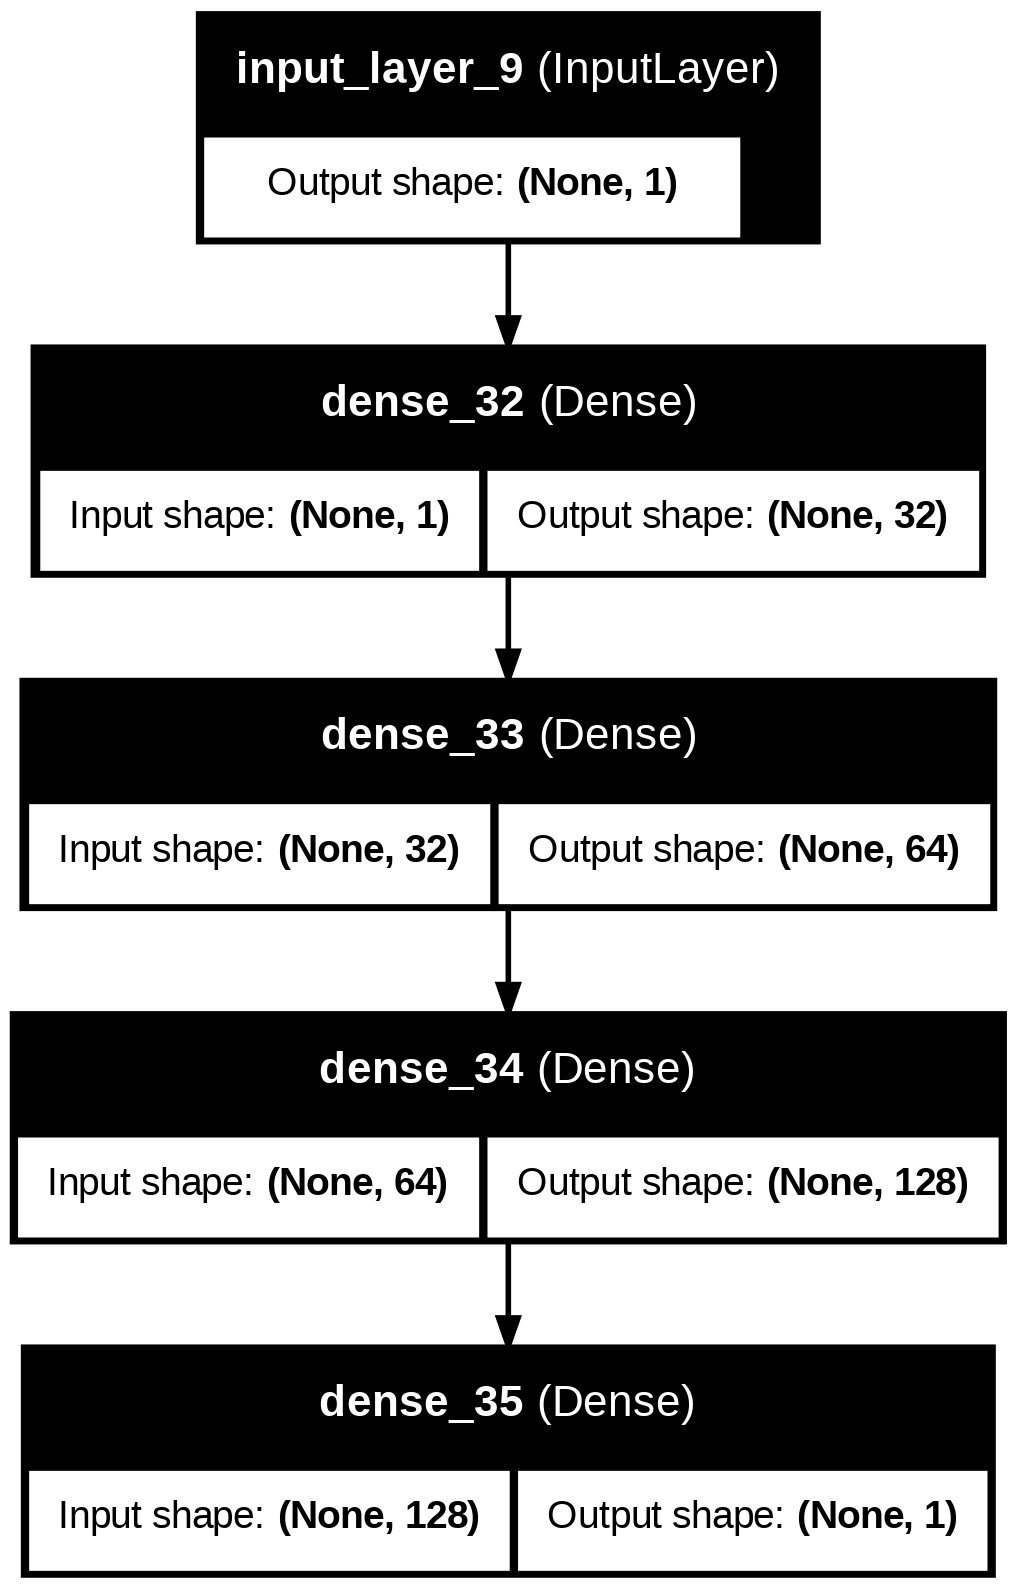

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_layer_names=True,show_shapes=True,)

In [ ]:
import keras.metrics
import sklearn.metrics


model.compile(
    loss='mse',
    optimizer='adam',
    metrics=[tensorflow.keras.metrics.R2Score(name='accuracy')]
)

In [ ]:
history = model.fit(X_train,y_train,batch_size=32,
                    validation_data=(X_val,y_val),epochs=100,
                    shuffle=True,
                    callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)])

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6886 - loss: 0.0426 - val_accuracy: 0.9777 - val_loss: 0.0031
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0021 - val_accuracy: 0.9968 - val_loss: 4.3318e-04
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 3.2846e-04 - val_accuracy: 0.9987 - val_loss: 1.7701e-04
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 1.4360e-04 - val_accuracy: 0.9997 - val_loss: 3.8719e-05
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 5.4972e-05 - val_accuracy: 0.9998 - val_loss: 2.5345e-05
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 3.0153e-05 - val_accuracy: 0.9999 - val_loss: 1.0898e-05
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 2.0423e-05 - val_accuracy: 0.9999 - val_loss: 1.0402e-05
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [ ]:
print("Training Accuracy : ",model.evaluate(X_train,y_train)[1])
print("Validation Accuracy : ",model.evaluate(X_val,y_val)[1])
print("Testing Accuracy : ",model.evaluate(X_test,y_test)[1])

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 5.4117e-06
Training Accuracy :  0.9999628067016602
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.7908e-06 
Validation Accuracy :  0.999957263469696
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.4394e-06 
Testing Accuracy :  0.9999637007713318


# Show Curves

Text(0.5, 1.0, 'Traning and Validation Loss')

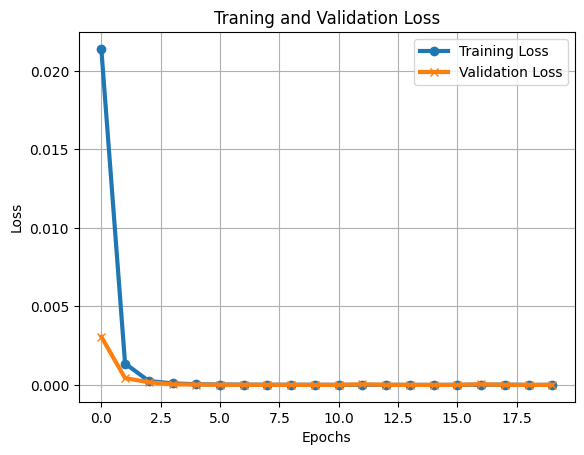

In [ ]:
from os import linesep
plt.plot(history.history['loss'],linewidth=3,marker='o')
plt.plot(history.history['val_loss'],linewidth=3,marker='x')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.title("Traning and Validation Loss")

Text(0.5, 1.0, 'Traning and Validation Accuracy')

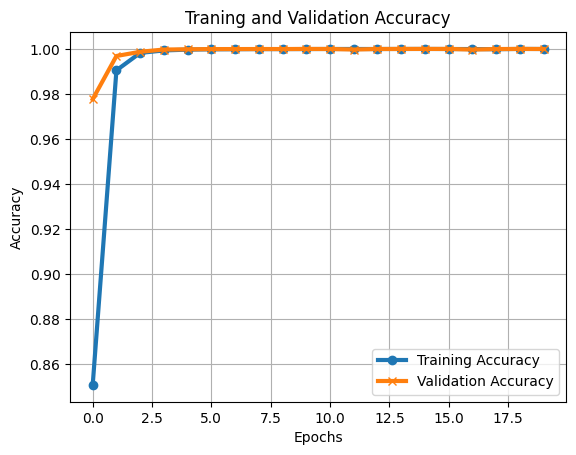

In [ ]:
from os import linesep
plt.plot(history.history['accuracy'],linewidth=3,marker='o')
plt.plot(history.history['val_accuracy'],linewidth=3,marker='x')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Traning and Validation Accuracy")

# Test Prediction

## Manual Calculation

## Model Prediction

In [ ]:
P = 3
Z = 8*P**3 - 5*P**2 + 7*P + 2
print("Calculation using Math Library : ",Z)

Calculation using Math Library :  194


In [ ]:
Z = scaler_y.inverse_transform(model.predict(np.array([[P]])))
print("Calculation using Model : ",Z)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Calculation using Model :  [[307388.8]]
